# Introduction to linear models

Peter Ralph

https://uodsci.github.io/dsci345

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd
from dsci345 import pretty
import sklearn

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}} \newcommand{\cov}{\text{cov}} \newcommand{\cor}{\text{cor}}$$
This is here so we can use `\P` and `\E` and `\var` and `\cov` and `\cor` and `\sd` in LaTeX below.

# A first linear model

If we suppose two random variables $X$ and $Y$ depend on each other,
perhaps the simplest set-up is that
$$ Y = a X + b + \epsilon, $$
where
- $a$ is the *slope*, i.e., how much $Y$ goes up by, on average, per unit of increase in $X$,
- $b$ is the *intercept*, i.e., the expected value of $Y$ when $X=0$ (if this makes sense),
- $\hat Y = a X + b$ is the *predicted value* of $Y$ given $X$,
- $\epsilon = Y - \hat Y$ is the *residual*, which for the above to be true must have mean zero.

# Prediction

Suppose $X$ and $Y$ are two, related, measurements,
which we treat as random variables having some joint distribution.
*Question:* If we know the value of $X$, how are we to best$^*$ predict the value of $Y$?

$^*$ where how about "best" means "with smallest mean squared error" (i.e., smallest MSE)

So: we'd like to define an estimator of $Y$,
which we'll call $\hat Y$,
and will be a function of $X$ (and only $X$),
and we'd like that estimator to minimize
$$ \E[(Y - \hat Y)^2] \qquad \text{(the MSE)}.$$

## First observation

If we're allowed to add a constant to our estimator,
then the mean of the optimal estimator, $\hat Y$, must match that of $Y$:
$$ \E[\hat Y] = \E[Y] . $$

*Note:* for a counterexample about the "if we're allowed to add a constant"
note, suppose we're looking for an $a$ such that $\hat Y = \exp(a X)$;
then $\hat Y + m$ is *not* allowed, as it doesn't take the same form.

*Proof:*
Suppose that $\tilde Y$ is an estimator;
consider the MSE for $\tilde Y + m$, where $m$ is a number,
which we define to be $f(m)$:
$$\begin{aligned}
 f(m)
 &=
 \E[(Y - (\tilde Y + m))^2] \\
 &=
 \E[(Y - \tilde Y)^2]
 - 2 m \E[Y - \tilde Y]
 + m^2 .
\end{aligned}$$
We want to find the value of $m$ that minimizes $f(m)$,
so differentiate with respect to $m$:
$$\begin{aligned}
 f'(m)
 &=
 - 2\E[Y - \tilde Y]
 + 2 m .
\end{aligned}$$
Setting this equal to zero, we find that $f'(m) = 0$ if
$$ m = \E[Y - \tilde Y] = \E[Y] - \E[\tilde Y]. $$

In conclusion, we've found out that if $\tilde Y$ is an estimator,
then $\hat Y = \tilde Y + \E[Y] - \E[\tilde Y]$ is a *better* estimator.
And, notice that (by additivity of means),
$\E[\hat Y] = \E[Y]$.

So, any estimator of $Y$ can be improved (in the mean-squared-error sense)
by shifting it so that the mean of the estimator is equal to the mean of $Y$. 

## Second observation

If the estimator $\hat Y$ is *linear*,
i.e.,
$$ \hat Y = a X + b $$
for some $a$ and $b$, then
$$
a = \frac{\sd[Y]}{\sd[X]} \cor[X, Y] ,
$$
and $b$ is chosen so that $\E[\hat Y] = \E[Y]$:
$$ b = \E[Y] - a \E[X] .$$

In words, the slope, $a$,
is equal to the correlation between $X$ and $Y$,
but in units of standard deviations.

*Proof:*
We'll do just the same thing as above.
First, thanks to the first observation,
we can assume $\E[X] = \E[Y] = 0$,
which implies that $b = 0$,
and $\E[X^2] = \var[X]$ and $\E[Y^2] = \var[Y]$
and $\E[XY] = \cov[X,Y]$.
Now,
$$\begin{aligned}
    \text{(MSE)}
    &= \E[(Y - \hat Y)^2 ] \\
    &= \E[(Y - a X)^2 ] \\
    &= \E[Y^2 - 2 a X Y + a^2 X^2 ] \\
    &= \var[Y] - 2 a \cov[X, Y] + a^2 \var[X] .
\end{aligned}$$
If we differentiate this with respect to $a$
and set it equal to zero,
we find that the MSE is minimized at
$$ a = \frac{\cov[X,Y]}{\var[X]} . $$
If we now substitute in for $\cov[X,Y] = \sd[X]\sd[Y]\cor[X,Y]$,
we get the form of $a$ above.

# The Normal distribution and least squares

How good the estimation procedure above works
depends on the situation, of course.
Here's one concrete situation - i.e., model -
that we might expect to (a) describe a lot of real-world situations pretty well,
and (b) be well-suited to fitting with a linear model by least squares:
$$\begin{aligned}
    Y &\sim \text{Normal}(\text{mean}=a X + b, \text{sd}=\sigma) .
\end{aligned}$$

Another way of writing the same thing is
$$\begin{aligned}
    Y &= a X + b + \epsilon \\
    \epsilon &\sim \text{Normal}(\text{mean}=0, \text{sd}=\sigma) .
\end{aligned}$$

Now suppose we have $n$ data points:
these will be *pairs* $(x_1, y_1), \ldots, (x_n, y_n)$.
We'd then like to fit the model above -- i.e., find $a$, $b$, and $\sigma$ --
by maximum likelihood.

To do this, we need the *likelihood function*:
$$
    \prod_{i=1}^n \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(y_i - a x_i - b)^2}{2 \sigma^2}} .
$$
The term in the exponential is known as the *residual*,
since it's the difference between the observed value ($y_i$)
and the value predicted using $x$ under the model ($a x_i + b$):
$$  y_i - a x_i - b = e_i . $$
It is our estimate of $\epsilon$ in the model we are trying to fit.

Now, the logarithm of the likelihood function (i.e., the log-likelihood) is
$$
    \ell(a, b, \sigma)
    =
    -  \frac{1}{2 \sigma^2} \sum_{i=1}^n e_i^2
    - \frac{n}{2} \log(2 \pi \sigma^2) .
$$
Notice that the only place that $a$ and $b$ enter in to this is via the errors, $e_i$.

Therefore, to find the values of $a$ and $b$ that maximize $\ell(a, b, \sigma)$,
*regardless* of $\sigma$,
we need to *minimize* $\sum_i e_i^2$, the sum of squared errors.

In other words, the maximum likelihood estimates of $a$ and $b$
are the *same* as the the values of $a$ and $b$ that minimize the MSE!

(You can work out the MLE for $\sigma$ yourself.)

# Multivariate linear models

Now suppose that we have a bunch of variables we want to use to predict $Y$.
Call these $X = (X_1, \ldots, X_k)$.
To do this, let's define coefficients $a = (a_1, \ldots, a_k)$, and
using them produce the estimate
$$ \hat Y = a_1 X_1 + \cdots + a_k X_k , $$
and as before find $a$ to minimize the MSE,
$$ \E[(Y - \hat Y)^2] . $$

Here we haven't explicitly included an intercept (before, $b$)
because we can just assume that one of the $X_i$'s is always equal to 1
(and if not, stick on a dummy variable that is).

Notice that the estimate is just the inner product of $a$ and $X$,
i.e., $\hat Y = a^T X$.
Substituting this in to the MSE:
$$\begin{aligned}
    \E[(Y - \hat Y)^2]
    &=
    \E[(Y - a^T X)^2] \\
    &=
    \E[Y^2 - 2 Y a^T X + (a^T X)^2] .
\end{aligned}$$
Now, we want to find the value of $a$ that makes the derivative of this equal to zero.
Unlike before, $a$ is a $k$-vector, not a single number,
but multivariable calculus tells us that
(1) $\frac{d}{da} a^T x = x$, and (b) $\frac{d}{da} (a^T x)^2 = 2 x x^T a$.
So,
$$\begin{aligned}
    \frac{d}{da} \E[(Y - \hat Y)^2]
    &=
    - 2 \E[XY] + 2 \E[X X^T] a .
\end{aligned}$$
Note that $\E[XY]$ is a *vector*,
whose $i^\text{th}$ component is $\E[X_i Y]$,
and $\E[X X^T]$ is a *matrix*, whose $(i,j)^\text{th}$
component is $\E[X_i X_j]$.
Think of these as the vector of covariances of $X$ with $Y$
and the covariance matrix of $X$, respectively.
The value of $a$ that makes this zero is
$$
    a = \E[X X^T]^{-1} \E[X Y] ,
$$
where $X^T$ is the transpose of $X$
and $\E[X X^T]^{-1}$ is the inverse of the matrix $\E[X X^T]$, if it exists.

What have we learned?
We've found that the linear estimator of $Y$ that minimizes the mean-squared error
can be found through some simple linear algebra
using the covariance matrix of $X$ and the vector of correlations between $X$ and $Y$.

# Multivariate linear models, take 2

Let's look at that again, but from the point of view of data.
Now suppose we have a vector of *reponses*
$y = (y_1, \ldots, y_n)$
and a matrix of *predictors* $X = (x_1, \ldots, x_n)$,
where $x_i = (x_{i1}, \ldots, x_{ik})$ is the $i^\text{th}$ row of $X$.
Think of $X$ and $y$ as *training data*,
and we want to know how we can best predict (future) $y$ using the corresponding (future) values of $x$.
One way to answer this is to ask:
what are the coefficients $a = (a_1, \ldots, a_k)$ for which
$$ \hat y_i = a_1 x_{i1} + \cdots a_k x_{ik} $$
best predicts $y_i$ in our training data?

## Mean squared error, again

One way to answer this question is by finding the $a$ that minimizes
$$ M(a) = \sum_{i=1}^n (y_i - \hat y_i)^2 $$
... which, divided by $n$, is the mean squared error.

Writing this out in vector notation, this is $M(a) = (y - \hat y)^T (y - \hat y)$,
and since $\hat y = X a$,
$$\begin{aligned}
    M(a)
    &=
    y^T y - 2 a^T X^T y + a^T X^T X a .
\end{aligned}$$
So,
$$\begin{aligned}
    \frac{d}{da} M(a)
    &=
    - 2 X^T y + 2 X^T X a ,
\end{aligned}$$
and the value of $a$ that makes this zero is
$$
    a = (X^T X)^{-1} X^T y .
$$
Note the similarity to the previous theory.

# Example

(switch to the elephant example)

# With scikit-learn

Let's see how to do the same thing using a package, scikit-learn.
First, we'll simulate up some simple data:

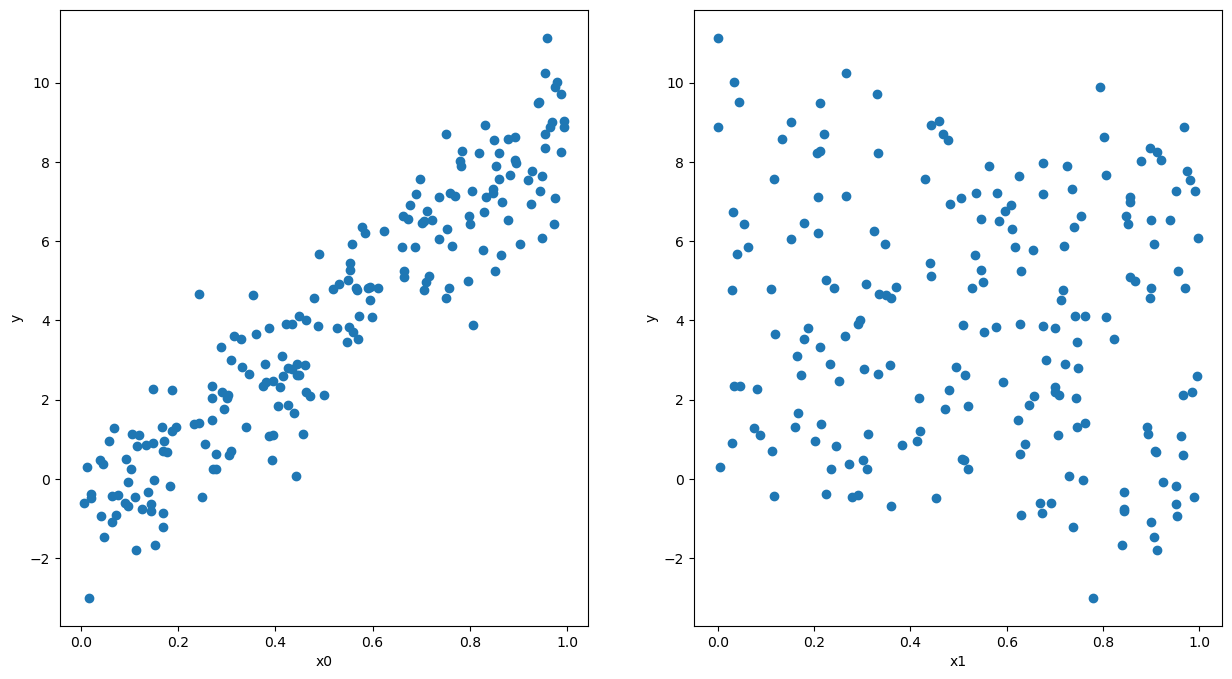

In [3]:
n = 200
k = 2
x = rng.uniform(size=(n, k))
beta = [10, -2]
y = x.dot(beta) + rng.normal(size=n)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(x[:,0], y); ax1.set_xlabel(f"x0"); ax1.set_ylabel("y")
ax2.scatter(x[:,1], y); ax2.set_xlabel(f"x1"); ax2.set_ylabel("y");

In [4]:
from sklearn import linear_model
line_reg = linear_model.LinearRegression(fit_intercept=True)
line_reg.fit(x, y)
line_reg.coef_

array([10.14243791, -1.85567275])

In [6]:
line_reg.intercept_

-0.21292121747192905

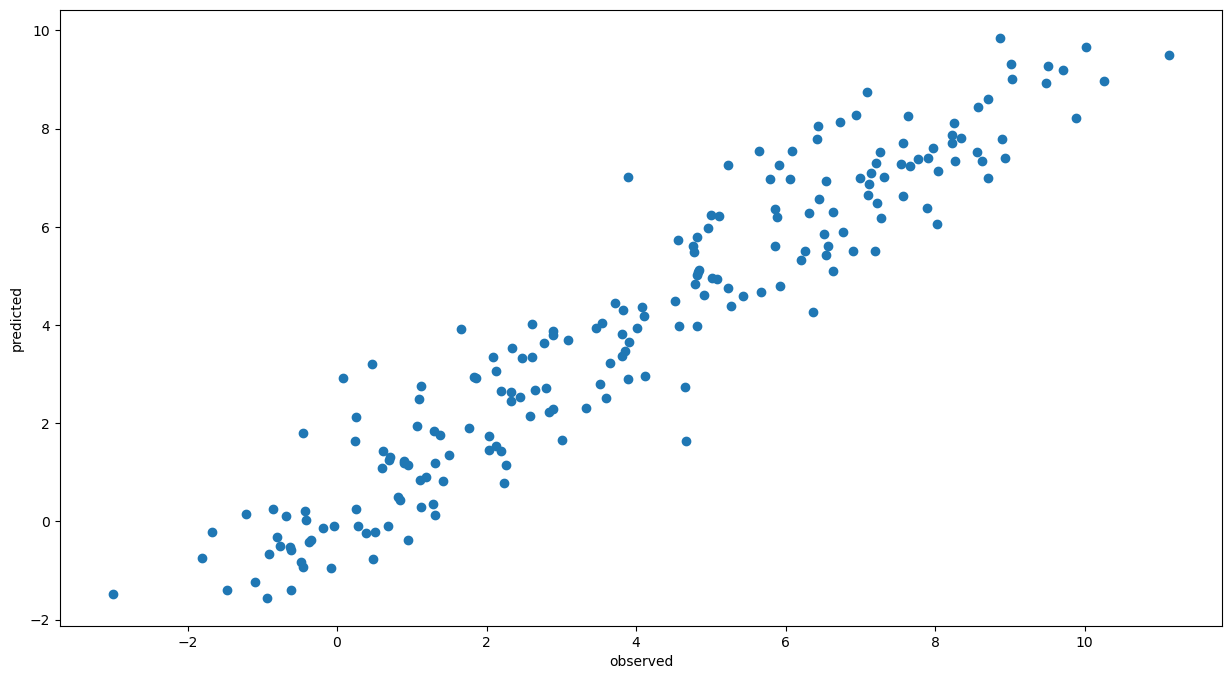

In [10]:
plt.scatter(y, y_hat)
plt.xlabel("observed")
plt.ylabel("predicted");

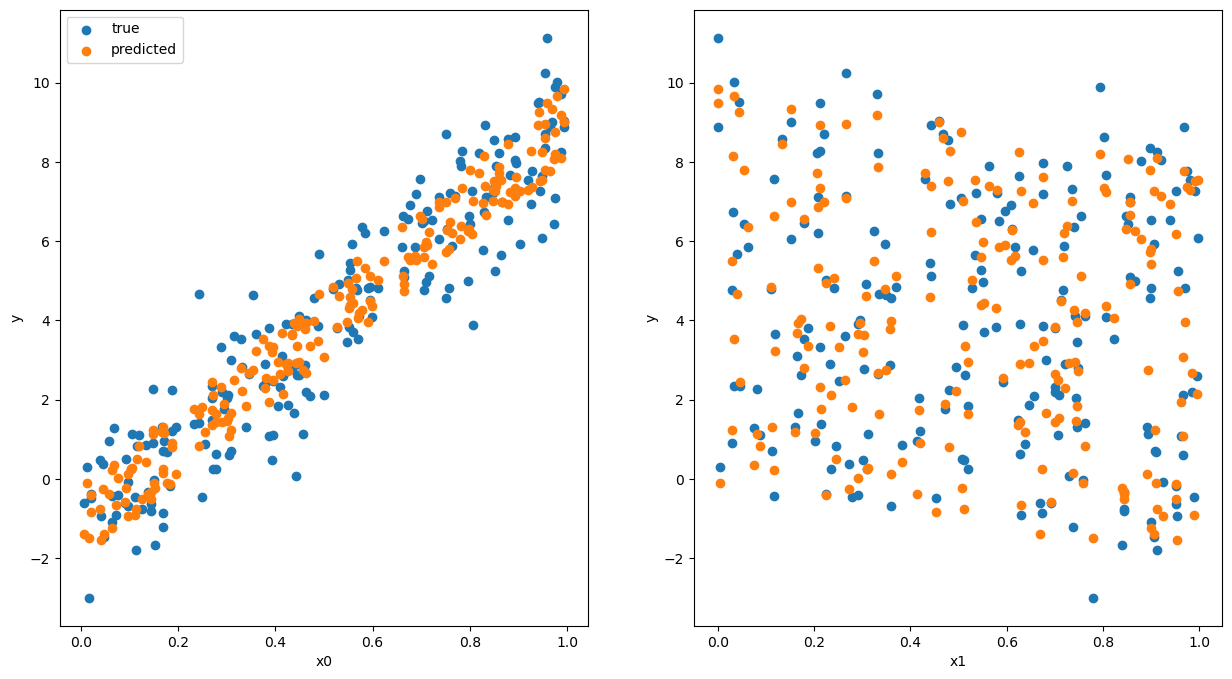

In [8]:
y_hat = line_reg.predict(x)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(x[:,0], y, label='true'); ax1.set_xlabel(f"x0"); ax1.set_ylabel("y")
ax2.scatter(x[:,1], y); ax2.set_xlabel(f"x1"); ax2.set_ylabel("y")
ax1.scatter(x[:,0], y_hat, label='predicted'); ax2.scatter(x[:,1], y_hat);
ax1.legend();